In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score 
import missingno as msno
import pgeocode
from sklearn.preprocessing import TargetEncoder, LabelEncoder
import scipy.stats as stats
import re

In [52]:
data = pd.read_csv(("SBAnational.csv"), low_memory=True)

/tmp/ipykernel_62178/2587724649.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(("SBAnational.csv"), low_memory=True)


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [77]:
missing_values = data.isna().sum()
missing_values



LoanNr_ChkDgt              0
Name                      14
City                       0
State                      0
Zip                        0
Bank                    1559
BankState               1566
NAICS                      0
ApprovalDate               0
ApprovalFY                 0
Term                       0
NoEmp                      0
NewExist                 136
CreateJob                  0
RetainedJob                0
FranchiseCode              0
UrbanRural                 0
RevLineCr               4528
LowDoc                  6007
ChgOffDate            736465
DisbursementDate        2368
DisbursementGross          0
BalanceGross               0
MIS_Status              1997
ChgOffPrinGr               0
GrAppv                     0
SBA_Appv                   0
domaine d’activite         0
dtype: int64

In [55]:
doublons = data[data.duplicated()]
doublons



,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv


In [56]:
description = data.describe()
description

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312760,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [57]:
colonnes = data.columns
colonnes

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

Nettoyage colonnes $ et , 

In [58]:
ColonnesUSD = ["DisbursementGross", "BalanceGross", "ChgOffPrinGr", "GrAppv", "SBA_Appv"]
data[ColonnesUSD] = data[ColonnesUSD].replace(r'[\$,]', '', regex=True).astype(float)
data[ColonnesUSD].head()


,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.0,0.0,0.0,60000.0,48000.0
1,40000.0,0.0,0.0,40000.0,32000.0
2,287000.0,0.0,0.0,287000.0,215250.0
3,35000.0,0.0,0.0,35000.0,28000.0
4,229000.0,0.0,0.0,229000.0,229000.0


In [78]:
data.to_csv("datawithout$.csv", index=False)

In [59]:
data.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,35000.0,0.0,P I F,0.0,35000.0,28000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,229000.0,0.0,P I F,0.0,229000.0,229000.0


valeurs manquantes

In [60]:
manquants = data[data.isnull().any(axis=1)]
manquants

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,35000.0,0.0,P I F,0.0,35000.0,28000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,229000.0,0.0,P I F,0.0,229000.0,229000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899158,9995563001,SHADES WINDOW TINTING AUTO ALA,IRVING,TX,75062,LOANS FROM OLD CLOSED LENDERS,DC,0,27-Feb-97,1997,...,N,Y,NaN,30-Jun-97,79000.0,0.0,P I F,0.0,79000.0,63200.0
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,70000.0,0.0,P I F,0.0,70000.0,56000.0
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,NaN,31-Oct-97,85000.0,0.0,P I F,0.0,85000.0,42500.0
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,NaN,30-Sep-97,300000.0,0.0,P I F,0.0,300000.0,225000.0


In [61]:
manquants = data.isnull().sum()
missing_percent = (manquants / len(data)) * 100
missing_table = pd.concat([manquants, missing_percent], axis=1)
print(missing_table)

                        0          1
LoanNr_ChkDgt           0   0.000000
Name                   14   0.001557
City                   30   0.003336
State                  14   0.001557
Zip                     0   0.000000
Bank                 1559   0.173383
BankState            1566   0.174162
NAICS                   0   0.000000
ApprovalDate            0   0.000000
ApprovalFY              0   0.000000
Term                    0   0.000000
NoEmp                   0   0.000000
NewExist              136   0.015125
CreateJob               0   0.000000
RetainedJob             0   0.000000
FranchiseCode           0   0.000000
UrbanRural              0   0.000000
RevLineCr            4528   0.503579
LowDoc               2582   0.287156
ChgOffDate         736465  81.905526
DisbursementDate     2368   0.263356
DisbursementGross       0   0.000000
BalanceGross            0   0.000000
MIS_Status           1997   0.222095
ChgOffPrinGr            0   0.000000
GrAppv                  0   0.000000
S

Villes manquantes

In [62]:
states_manquants = data[data["State"].isnull()]
states_manquants

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
35517,1270833006,SO. JERSEY DANCE/MERRYLEES,PENNSVILLE,NaN,8070,NaN,NaN,0,28-Jul-81,1981,...,N,N,5-Mar-90,NaN,0.0,0.0,NaN,11364.0,15000.0,15000.0
49244,1380800010,TRYON COATS & LEATHER,JOHNSTOWN NY,NaN,0,KEYBANK NATIONAL ASSOCIATION,NY,0,18-May-66,1966,...,N,N,29-Mar-90,16-Aug-66,60000.0,0.0,CHGOFF,6084.0,60000.0,54000.0
264664,2850643009,CENTURY 21 PHILLIPS REALTY,CAMERON PARK,NaN,95682,SBA - EDF ENFORCEMENT ACTION,CO,0,12-Feb-87,1987,...,N,N,NaN,17-Jun-87,81000.0,0.0,P I F,0.0,83000.0,83000.0
306274,3113583009,THE COMPUTER EDGE,"BOX 267, APO AP",NaN,96205,RTC/WESTPORT SAVINGS BANK,CA,541511,21-Jan-88,1988,...,N,N,18-Sep-93,16-Mar-88,50000.0,0.0,CHGOFF,30589.0,50000.0,45000.0
328526,3280213000,KING'S TRUCK WASH,WICHITA,NaN,67219,SOUTH CENT. KANSAS ECONOMIC DE,KS,811192,5-Aug-88,1988,...,N,N,NaN,12-Jul-89,119000.0,0.0,P I F,0.0,119000.0,119000.0
351072,3445553007,JAMES A. NICHOLS,"1542,TABUK,SAUDI ARABIA",NaN,79925,WELLS FARGO BANK NATL ASSOC,TX,532230,19-May-89,1989,...,N,N,NaN,31-Jul-89,60000.0,0.0,P I F,0.0,60000.0,54000.0
366139,3556993002,"GOLF SHOES UNLIMITED, INC.",PALM BEACH GARDENS,NaN,33410,"BEAL BANK, SSB",TX,451110,19-Oct-89,1990,...,N,N,NaN,31-Jan-90,75000.0,0.0,P I F,0.0,75000.0,67500.0
366158,3557093005,CASCO SERVICE,CASCO,NaN,54205,UNION STATE BANK,WI,0,19-Oct-89,1990,...,N,N,NaN,30-Apr-90,300000.0,0.0,P I F,0.0,300000.0,252600.0
367007,3563473008,P & P TOOL INC,SOMERSET,NaN,54025,FIRST BANK OF BALDWIN,WI,0,26-Oct-89,1990,...,N,N,NaN,31-Jan-90,82000.0,0.0,P I F,0.0,82000.0,73800.0
379174,3664443009,WILLIAMS JEWELERS,SALT LAKE CITY,NaN,84124,ZIONS FIRST NATIONAL BANK,UT,448310,14-Dec-89,1990,...,N,N,NaN,31-Jul-90,250000.0,0.0,P I F,0.0,250000.0,212500.0


In [63]:
data.loc[data["Zip"] == 76645, "State"] = "TX"
data.loc[data["Zip"] == 76052, "State"] = "TX"
data.loc[data["Zip"] == 75236, "State"] = "TX"
data.loc[data["Zip"] == 65049, "State"] = "MO"
data.loc[data["Zip"] == 84124, "State"] = "UT"
data.loc[data["Zip"] == 8070, "State"] = "NJ"
data["State"] = data["State"].fillna(data["BankState"])

In [66]:
villes_manquantes = data [data["City"].isnull()]
villes_manquantes

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv


addition nom villes manquantes

In [65]:
data.loc[data["Zip"] == 63103, "City"] = "Saint Louis"
data.loc[data["Zip"] == 92102, "City"] = "San Diego"
data.loc[data["Zip"] == 48502, "City"] = "Flint"
data.loc[data["Zip"] == 28402, "City"] = "Wilmington"
data.loc[data["Zip"] == 92102, "City"] = "San Diego"
data.loc[data["Zip"] == 2165, "City"] = "Boston"
data.loc[data["Zip"] == 40209, "City"] = "Louisville"
data.loc[data["Zip"] == 2401, "City"] = "Providence"
data.loc[data["Zip"] == 2108, "City"] = "Boston"
data.loc[data["Zip"] == 2169, "City"] = "Quincy"
data.loc[data["Zip"] == 64106, "City"] = "Kansas City"
data.loc[data["Zip"] == 78204, "City"] = "San Antonio"
data.loc[data["Zip"] == 84109, "City"] = "Salt Lake City"
data.loc[data["Zip"] == 70130, "City"] = "New Orleans"
data.loc[data["Zip"] == 50309, "City"] = "Des Moines"
data.loc[data["Zip"] == 98104, "City"] = "Seattle"
data.loc[data["Zip"] == 63013, "City"] = "Beaufort"
data.loc[data["Zip"] == 63105, "City"] = "Clayton"
data.loc[data["Zip"] == 44115, "City"] = "Cleveland"
data.loc[data["Zip"] == 60636, "City"] = "Chicago"
data.loc[data["Zip"] == 60624, "City"] = "Chicago"


In [83]:
data.to_csv("datawithout$.csv", index=False)

extraction domaine d’activité

In [67]:
data["domaine d’activite"] = data["NAICS"].astype(str).str[:2]

In [68]:
data.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,domaine d’activite
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,Y,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0,45
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,Y,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0,72
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,NaN,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0,62
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,Y,NaN,30-Jun-97,35000.0,0.0,P I F,0.0,35000.0,28000.0,0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,NaN,14-May-97,229000.0,0.0,P I F,0.0,229000.0,229000.0,0


Verification validité date.

In [69]:
invalid_years = data[~data['ApprovalFY'].astype(str).str.match(r'^\d{4}$')]
invalid_years

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,domaine d’activite
699732,7268591001,FASHION NOVELTY CORP OF NJ,CARLSTADT,NJ,7072,VALLEY NATIONAL BANK,NJ,0,29-Sep-76,1976A,...,N,9-Jul-93,23-Nov-76,350000.0,0.0,CHGOFF,48361.0,350000.0,315000.0,0
704030,7319361003,J W HUGHES HUGHES 66 GLDN PLNS,FOLLETT,TX,79034,FIRSTBANK SOUTHWEST,TX,0,17-Sep-76,1976A,...,N,23-Nov-88,1-Dec-76,325000.0,0.0,CHGOFF,45910.0,325000.0,292500.0,0
705375,7334771006,CROWN POINT LUMBER,CROWN POINT,IN,46307,JPMORGAN CHASE BANK NATL ASSOC,IN,0,10-Sep-76,1976A,...,N,30-Dec-92,7-Feb-77,145000.0,0.0,CHGOFF,0.0,145000.0,130500.0,0
710381,7389331000,BAUMAN'S APPLIANCE,ODESSA,NY,14869,CHEMUNG CANAL TRUST COMPANY,NY,0,19-Jul-76,1976A,...,N,3-Apr-89,9-Aug-76,15000.0,0.0,CHGOFF,475.0,15000.0,13500.0,0
713245,7420741004,THE TOGGERY,SPRINGFIELD,MA,1103,BANK OF AMERICA NATL ASSOC,RI,0,30-Aug-76,1976A,...,N,29-Jun-89,NaN,73000.0,0.0,CHGOFF,827.0,73000.0,40150.0,0
748029,7799101004,"JUSTIN TYME,INC.",COLUMBUS,OH,43265,"PNC BANK, NATIONAL ASSOCIATION",OH,0,20-Aug-76,1976A,...,N,19-Dec-88,15-Sep-76,150000.0,0.0,CHGOFF,87037.0,150000.0,135000.0,0
751519,7848911008,MICHAELS TRUCK STOP,CHICAGO,IL,60633,BANK OF AMERICA NATL ASSOC,NC,0,29-Sep-76,1976A,...,N,10-Mar-89,NaN,550000.0,0.0,CHGOFF,572877.0,550000.0,495000.0,0
769515,8108191005,MIKE ESPARZA FUNERAL HOME,UVALDE,TX,78801,BANK OF AMERICA NATL ASSOC,TX,0,19-Jul-76,1976A,...,N,19-Apr-91,29-Mar-77,85000.0,0.0,CHGOFF,63850.0,85000.0,76500.0,0
775002,8191291000,JUG & JIGGER,YUCAIPA,CA,92399,BANK OF AMERICA NATL ASSOC,CA,0,20-Aug-76,1976A,...,N,1-Oct-91,20-Sep-76,94500.0,0.0,CHGOFF,63182.0,94500.0,85050.0,0
775430,8197661005,FANGMAN CABINET SHOP,DYERSVILLE,IA,52040,FDIC/DYERSVILLE,IL,0,26-Aug-76,1976A,...,N,1-Apr-92,3-Jan-77,72000.0,0.0,P I F,8509.0,72000.0,64800.0,0


In [70]:
data['ApprovalFY'] = data['ApprovalFY'].astype(str).apply(lambda x: x[:-1] if re.match(r'^\d{4}.$', x) else x)
data

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,domaine d’activite
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,Y,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0,45
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,Y,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0,72
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,NaN,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0,62
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,Y,NaN,30-Jun-97,35000.0,0.0,P I F,0.0,35000.0,28000.0,0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,NaN,14-May-97,229000.0,0.0,P I F,0.0,229000.0,229000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,N,NaN,30-Sep-97,70000.0,0.0,P I F,0.0,70000.0,56000.0,45
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,N,NaN,31-Oct-97,85000.0,0.0,P I F,0.0,85000.0,42500.0,45
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,NaN,30-Sep-97,300000.0,0.0,P I F,0.0,300000.0,225000.0,33
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,Y,8-Mar-00,31-Mar-97,75000.0,0.0,CHGOFF,46383.0,75000.0,60000.0,0


In [71]:
invalid_years = data[~data['ApprovalFY'].astype(str).str.match(r'^\d{4}$')]
invalid_years

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,domaine d’activite


invalid LowDoc

In [72]:
invalid_LowDoc = data[~data['LowDoc'].isin(['Y', 'N'])]
invalid_LowDoc

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,domaine d’activite
7413,1050326003,MILLER-ST. NAZIANZ INC,ST. NAZIANZ,WI,54232,WISCONSIN BUS. DEVEL FINAN COR,WI,333111,16-Feb-06,2006,...,C,NaN,13-Feb-08,1306000.0,0.0,P I F,0.0,1306000.0,1306000.0,33
23459,1176096001,MANOLO'S CAFE,DEMING,NM,88031,FIRST NEW MEXICO BANK,NM,722110,27-Feb-06,2006,...,C,NaN,30-Sep-06,160000.0,0.0,P I F,0.0,160000.0,120000.0,72
30877,1232806006,THE BAD ASS COFFEE COMPANY,EL PASO,TX,79938,STEARNS BK NATL ASSOC,MN,722213,2-Mar-06,2006,...,C,NaN,31-Mar-06,189000.0,0.0,P I F,0.0,189000.0,141750.0,72
35740,1272576003,CHESTNUT COMMONS LASER WSH LLC,AVON LAKE,OH,44012,THE LORAIN NATIONAL BANK,OH,811192,6-Mar-06,2006,...,C,NaN,31-May-06,1200000.0,0.0,P I F,0.0,1200000.0,900000.0,81
36376,1277995003,"Xcel Transportation, LLC",Martinsville,VA,24112,SUNTRUST BANK,GA,484110,22-Apr-05,2005,...,C,NaN,31-May-05,535000.0,0.0,P I F,0.0,250000.0,125000.0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886336,9718424003,CONSTRUCTION AND ENVIRONMENTAL,EL PASO,TX,79901,UNITED BK OF EL PASO DEL NORTE,TX,541620,19-Jan-06,2006,...,C,NaN,28-Feb-06,492315.0,0.0,P I F,0.0,200000.0,150000.0,54
886363,9719294003,PLASTIC MOLDING TECHNOLOGY INC,EL PASO,TX,79922,COMPASS BANK,TX,326199,19-Jan-06,2006,...,C,NaN,31-Mar-06,2000000.0,0.0,P I F,0.0,2000000.0,1500000.0,32
887812,9755534000,TRANS AMERICAN COMMUNICATIONS,EL PASO,TX,79925,CAPITAL CERT. DEVEL CORP,TX,238990,23-Jan-06,2006,...,C,NaN,14-Jun-06,131000.0,0.0,P I F,0.0,131000.0,131000.0,23
891829,9844504004,"DESERT SUN CHIROPRACTIC, PLLC",EL PASO,TX,79902,FIRST NATIONAL BANK,TX,621310,2-Feb-06,2006,...,C,NaN,30-Jun-06,135000.0,0.0,P I F,0.0,135000.0,114750.0,62


In [73]:
data['LowDoc'] = data['LowDoc'].apply(lambda x: x if x in ['Y', 'N'] else np.nan)
invalid_LowDoc = data[~data['LowDoc'].isin(['Y', 'N'])]
invalid_LowDoc

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,domaine d’activite
7413,1050326003,MILLER-ST. NAZIANZ INC,ST. NAZIANZ,WI,54232,WISCONSIN BUS. DEVEL FINAN COR,WI,333111,16-Feb-06,2006,...,NaN,NaN,13-Feb-08,1306000.0,0.0,P I F,0.0,1306000.0,1306000.0,33
23459,1176096001,MANOLO'S CAFE,DEMING,NM,88031,FIRST NEW MEXICO BANK,NM,722110,27-Feb-06,2006,...,NaN,NaN,30-Sep-06,160000.0,0.0,P I F,0.0,160000.0,120000.0,72
30877,1232806006,THE BAD ASS COFFEE COMPANY,EL PASO,TX,79938,STEARNS BK NATL ASSOC,MN,722213,2-Mar-06,2006,...,NaN,NaN,31-Mar-06,189000.0,0.0,P I F,0.0,189000.0,141750.0,72
35740,1272576003,CHESTNUT COMMONS LASER WSH LLC,AVON LAKE,OH,44012,THE LORAIN NATIONAL BANK,OH,811192,6-Mar-06,2006,...,NaN,NaN,31-May-06,1200000.0,0.0,P I F,0.0,1200000.0,900000.0,81
36376,1277995003,"Xcel Transportation, LLC",Martinsville,VA,24112,SUNTRUST BANK,GA,484110,22-Apr-05,2005,...,NaN,NaN,31-May-05,535000.0,0.0,P I F,0.0,250000.0,125000.0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886336,9718424003,CONSTRUCTION AND ENVIRONMENTAL,EL PASO,TX,79901,UNITED BK OF EL PASO DEL NORTE,TX,541620,19-Jan-06,2006,...,NaN,NaN,28-Feb-06,492315.0,0.0,P I F,0.0,200000.0,150000.0,54
886363,9719294003,PLASTIC MOLDING TECHNOLOGY INC,EL PASO,TX,79922,COMPASS BANK,TX,326199,19-Jan-06,2006,...,NaN,NaN,31-Mar-06,2000000.0,0.0,P I F,0.0,2000000.0,1500000.0,32
887812,9755534000,TRANS AMERICAN COMMUNICATIONS,EL PASO,TX,79925,CAPITAL CERT. DEVEL CORP,TX,238990,23-Jan-06,2006,...,NaN,NaN,14-Jun-06,131000.0,0.0,P I F,0.0,131000.0,131000.0,23
891829,9844504004,"DESERT SUN CHIROPRACTIC, PLLC",EL PASO,TX,79902,FIRST NATIONAL BANK,TX,621310,2-Feb-06,2006,...,NaN,NaN,30-Jun-06,135000.0,0.0,P I F,0.0,135000.0,114750.0,62


creation dictionnaire de categories d’activités

Gestion et Suppressions des Lignes ou MSI_statut manquant

In [75]:
data.to_csv("dataV2.csv", index=False)

In [76]:
data['MIS_Status'] = data['MIS_Status'].apply(lambda x: x if x in ['P I F', 'CHGOFF'] else np.nan)
invalid_MIS_Status = data[~data['MIS_Status'].isin(['P I F', 'CHGOFF'])]
invalid_MIS_Status.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,domaine d’activite
343,1002585010,"Chinaberry, LTD",Saratoga Springs,NY,12866,KEYBANK NATIONAL ASSOCIATION,OH,0,18-May-98,1998,...,N,NaN,30-Jun-98,474.0,0.0,NaN,0.0,30000.0,15000.0,0
611,1004503009,SMITHFIELD GLASS INC,DANIELSON,CT,6239,NaN,NaN,0,7-Jul-80,1980,...,N,22-May-90,NaN,0.0,0.0,NaN,144461.0,300000.0,300000.0,0
738,1005264007,AMERICAN CERTIFIED HOME INSPEC,BOISE,ID,83703,WELLS FARGO BANK NATL ASSOC,SD,0,3-Mar-97,1997,...,N,NaN,30-Apr-00,2585.0,0.0,NaN,0.0,10000.0,5000.0,0
740,1005273003,"GENERAL SOLAR COMPANY, INC.",SIOUX CITY,IA,51111,NaN,NaN,0,3-Jul-80,1980,...,N,8-Feb-90,NaN,0.0,0.0,NaN,142666.0,350000.0,350000.0,0
833,1005845000,SPROUT KIDS INC.,HUNTINGTON,NY,11743,JPMORGAN CHASE BANK NATL ASSOC,IL,424330,3-Mar-03,2003,...,N,NaN,31-Mar-03,1276.0,0.0,NaN,0.0,25000.0,12500.0,42


In [9]:
activitiestypes = {
    11: "Agriculture, forestry, fishing and hunting",
    21: "Mining, Quarrying, and oil and gas extraction",
    22: "Utilities",
    23: "Construction",
    31: "Manufacturing",
    32: "Manufacturing",
    33: "Manufacturing",
    42: "Wholesale trade",
    44: "Retail trade",
    45: "Retail trade",
    48: "Transportation and warehousing",
    49: "Transportation and warehousing",
    51: "Information",
    52: "Finance and insurance",
    53: "Real estate and rental and leasing",
    54: "Professional, scientific, and technical services",
    55: "Management of companies and enterprises",
    56: "Administrative and support and waste management and remediation services",
    61: "Educational services",
    62: "Health care and social assistance",
    71: "Arts, enternaiment, and recreation",
    72: "Accommodation and food services",
    81: "Other services (except public administration)",
    92: "Public administration"
    }

Domaine d’activité manquants = Non Mentionné

In [87]:
data["activities"] = data["domaine d’activite"].astype(int).map(activitiestypes)
data.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,domaine d’activite,activities
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0,45,Retail trade
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0,72,Accommodation and food services
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,NaN,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0,62,Health care and social assistance
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,NaN,30-Jun-97,35000.0,0.0,P I F,0.0,35000.0,28000.0,0,NaN
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,NaN,14-May-97,229000.0,0.0,P I F,0.0,229000.0,229000.0,0,NaN


In [88]:
data["activities"] = data["activities"].fillna("Unknown")

data.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,domaine d’activite,activities
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0,45,Retail trade
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0,72,Accommodation and food services
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,NaN,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0,62,Health care and social assistance
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,NaN,30-Jun-97,35000.0,0.0,P I F,0.0,35000.0,28000.0,0,Unknown
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,NaN,14-May-97,229000.0,0.0,P I F,0.0,229000.0,229000.0,0,Unknown


In [39]:
data = data.drop(columns=["ApprovalYears"])
data.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,domaine d’activite
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,Y,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0,45
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,Y,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0,72
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,NaN,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0,62
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,Y,NaN,30-Jun-97,35000.0,0.0,P I F,0.0,35000.0,28000.0,0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,NaN,14-May-97,229000.0,0.0,P I F,0.0,229000.0,229000.0,0


Diagramme de secteur d’activité

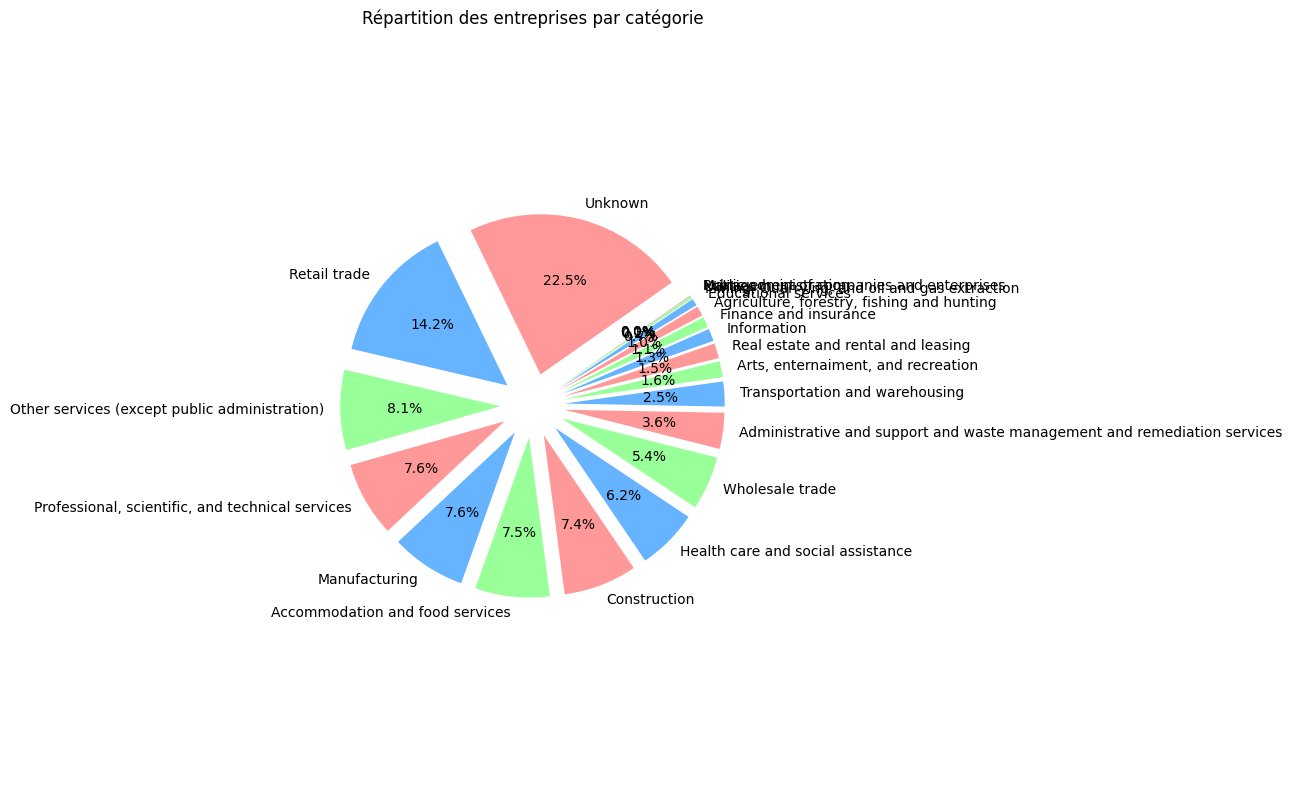

In [65]:
Categories = data["activities"].value_counts()

explode = [0.2] * len(Categories)

plt.figure(figsize=(12, 8))
plt.pie(Categories, labels=Categories.index, autopct='%1.1f%%', startangle=35, colors=['#ff9999','#66b3ff','#99ff99'], explode=explode)
plt.title('Répartition des entreprises par catégorie')
plt.axis('equal')  
plt.tight_layout()
plt.show()

Repartition par etats

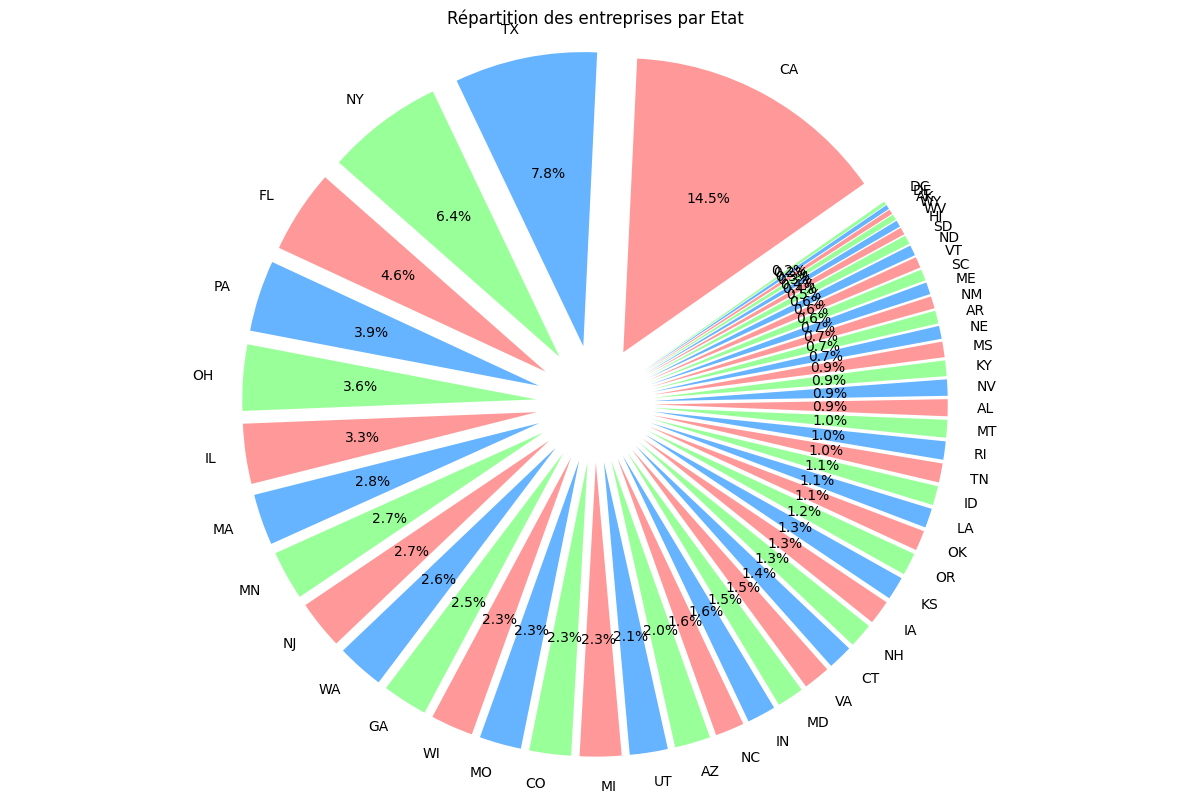

In [48]:
Etats = data["State"].value_counts()

explode = [0.2] * len(Etats)

plt.figure(figsize=(12, 8))
plt.pie(Etats, labels=Etats.index, autopct='%1.1f%%', startangle=35, colors=['#ff9999','#66b3ff','#99ff99'], explode=explode)
plt.title('Répartition des entreprises par Etat')
plt.axis('equal') 
plt.tight_layout()
plt.show()


repartition par années d’accord de pret

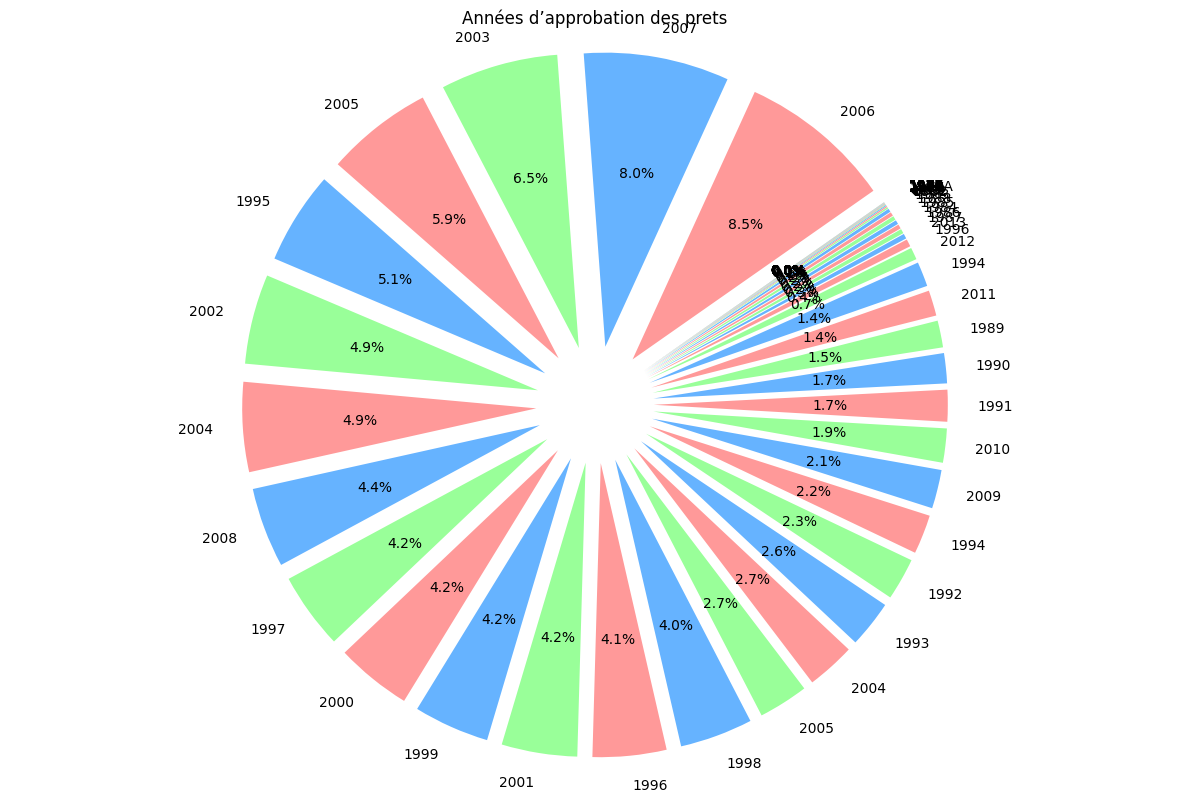

In [68]:
YearsApproval = data["ApprovalFY"].value_counts()

explode = [0.2] * len(YearsApproval)    

plt.figure(figsize=(12, 8))
plt.pie(YearsApproval, labels=YearsApproval.index, autopct='%1.1f%%', startangle=35, colors=['#ff9999','#66b3ff','#99ff99'], explode=explode)
plt.title('Années d’approbation des prets')
plt.axis('equal') 
plt.tight_layout()
plt.show()


analyse pas missingno

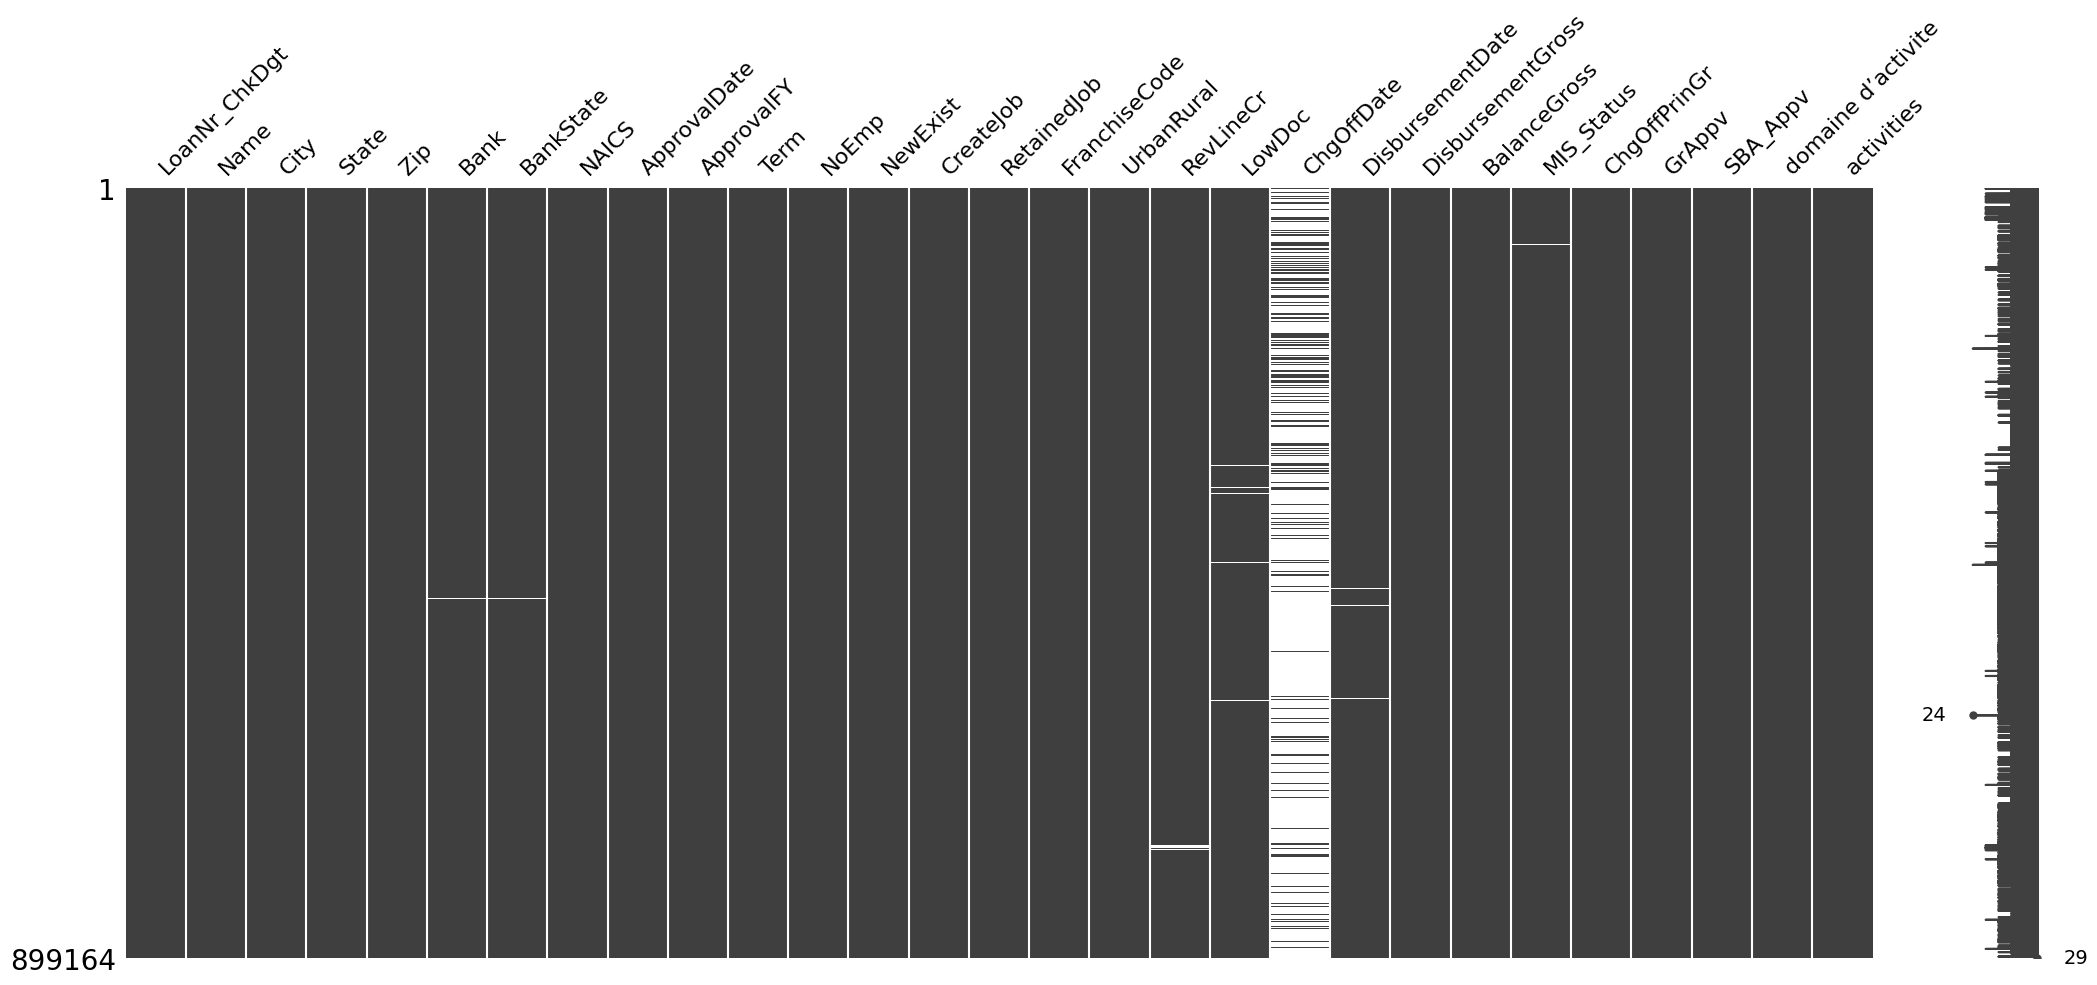

In [90]:
msno.matrix(data)
plt.show()

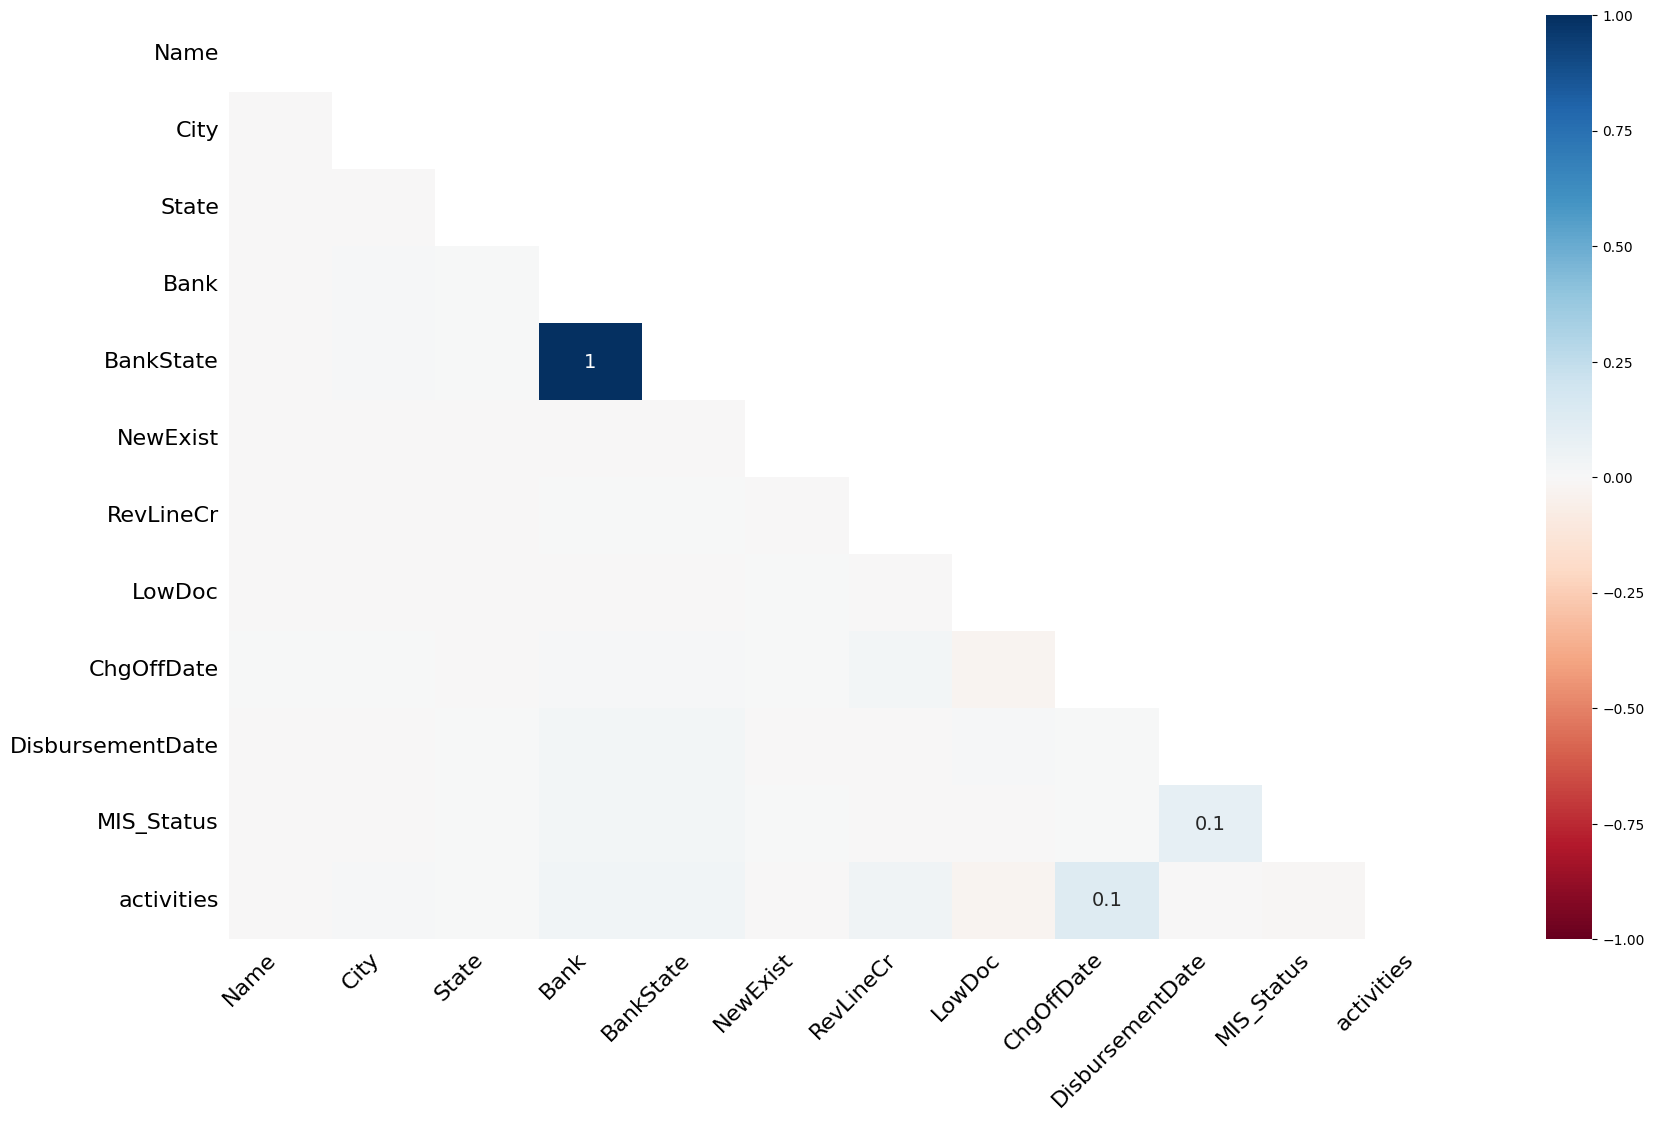

In [73]:
msno.heatmap(data)
plt.show()

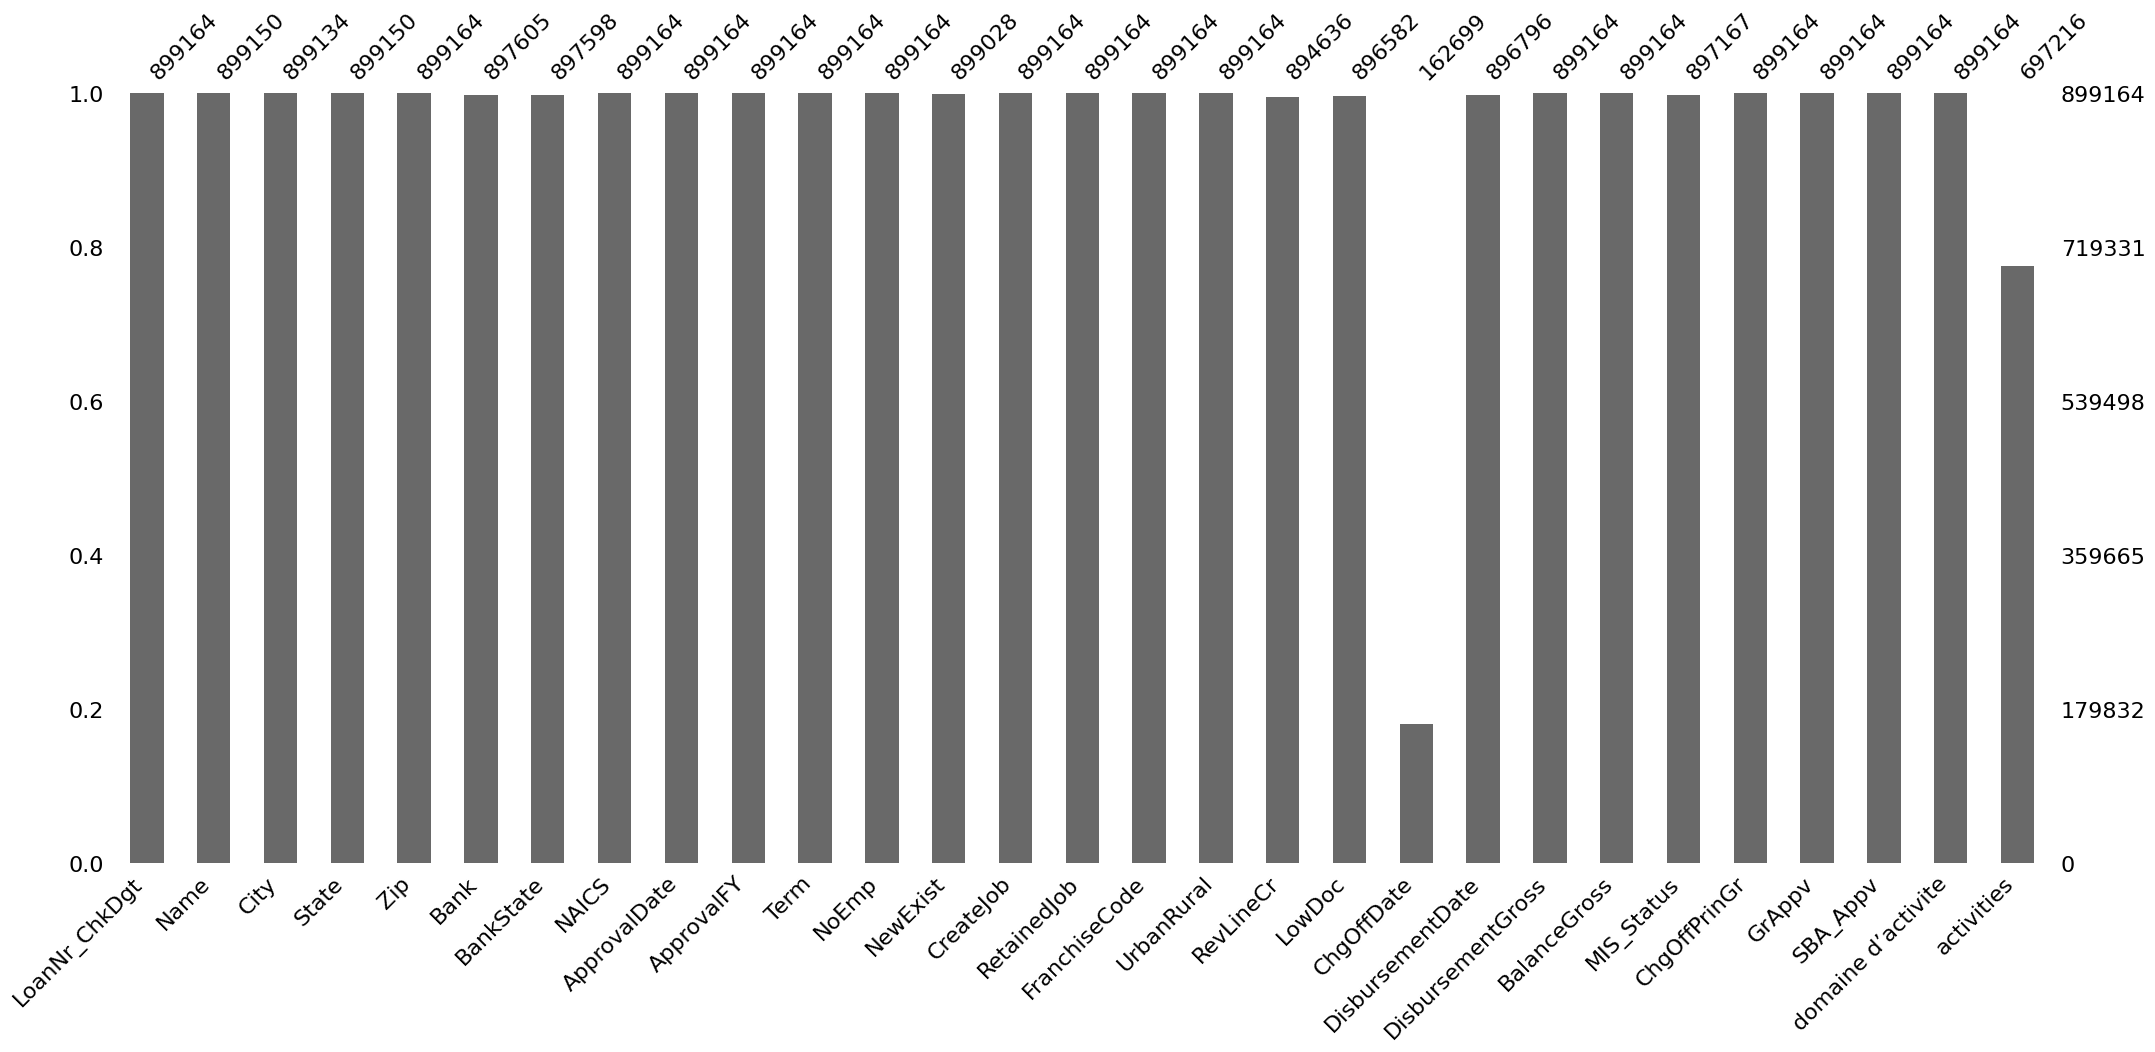

In [74]:
msno.bar(data)
plt.show()

One Hot Encoding des etats

In [68]:
data_hotencoding = pd.get_dummies(data, columns=["State"])
data_hotencoding.head()

,LoanNr_ChkDgt,Name,City,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,...,False,False,False,False,False,False,False,False,False,False
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,...,False,False,False,False,False,False,False,False,False,False
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,...,False,False,False,False,False,False,False,False,False,False
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,...,False,False,False,False,False,False,False,False,False,False
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,60,...,False,False,False,False,False,False,False,False,False,False
899160,9995603000,FABRIC FARMS,COLUMBUS,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,60,...,False,False,False,False,False,False,False,False,False,False
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,108,...,False,False,False,False,False,False,False,False,False,False
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,60,...,False,False,False,False,False,False,False,False,False,False


# Test Chi2
# Tableau de contingence State x MIS_status

In [91]:
tableau_de_contingence = pd.crosstab(data["State"], data["MIS_Status"])
Chi2, p_value, dof, expected = stats.chi2_contingency(tableau_de_contingence)
print("Chi2:", Chi2)
print("p_value:", p_value)
print("Degrees of freedom:", dof)
print("Expected:", expected)


Chi2: 11164.465254660368
p_value: 0.0
Degrees of freedom: 50
Expected: [[   422.00824819   1980.99175181]
 [  1468.1601976    6891.8398024 ]
 [  1112.18403486   5220.81596514]
 [  3095.07838786  14528.92161214]
 [ 22916.1191417  107572.8808583 ]
 [  3617.5397022   16981.4602978 ]
 [  2129.71037276   9997.28962724]
 [   283.27062186   1329.72937814]
 [   385.128626     1807.871374  ]
 [  7234.0257009   33957.9742991 ]
 [  3911.34735896  18360.65264104]
 [   633.4514154    2973.5485846 ]
 [  2104.94834072   9881.05165928]
 [  1667.66139191   7828.33860809]
 [  5197.2168526   24396.7831474 ]
 [  2472.51524187  11606.48475813]
 [  2011.87119901   9444.12880099]
 [  1355.76515855   6364.23484145]
 [  1680.65706831   7889.34293169]
 [  4406.58799978  20685.41200022]
 [  2328.50909808  10930.49090192]
 [  1042.63960444   4894.36039556]
 [  3598.92427385  16894.07572615]
 [  4277.86055662  20081.13944338]
 [  3627.02303362  17025.97696638]
 [  1346.63306163   6321.36693837]
 [  1534.36790029  

# Chi2 
# Categorie x MIS_status

In [92]:
tableau_de_contingence = pd.crosstab(data["activities"], data["MIS_Status"])
Chi2, p_value, dof, expected = stats.chi2_contingency(tableau_de_contingence)
print("Chi2:", Chi2)
print("p_value:", p_value)
print("Degrees of freedom:", dof)
print("Expected:", expected)

Chi2: 24554.800835464128
p_value: 0.0
Degrees of freedom: 20
Expected: [[1.18560961e+04 5.56549039e+04]
 [5.71265348e+03 2.68163465e+04]
 [1.57967715e+03 7.41532285e+03]
 [2.56682170e+03 1.20491783e+04]
 [1.16771421e+04 5.48148579e+04]
 [1.12412601e+03 5.27687399e+03]
 [1.66309534e+03 7.80690466e+03]
 [9.70531162e+03 4.55586884e+04]
 [1.99536318e+03 9.36663682e+03]
 [4.49580156e+01 2.11041984e+02]
 [1.19249380e+04 5.59780620e+04]
 [3.25067527e+02 1.52593247e+03]
 [1.27138107e+04 5.96811893e+04]
 [1.19282748e+04 5.59937252e+04]
 [3.98651154e+01 1.87134885e+02]
 [2.38628717e+03 1.12017128e+04]
 [2.22990001e+04 1.04676000e+05]
 [3.93523130e+03 1.84727687e+04]
 [3.54162037e+04 1.66250796e+05]
 [1.16258619e+02 5.45741381e+02]
 [8.54781834e+03 4.01251817e+04]]


# Chi2 Montant du pret x MIS_Status

In [44]:
tableau_de_contingence = pd.crosstab(data["DisbursementGross"], data["MIS_Status"])
Chi2, p_value, dof, expected = stats.chi2_contingency(tableau_de_contingence)
print("Chi2:", Chi2)
print("p_value:", p_value)
print("Degrees of freedom:", dof)
print("Expected:", expected)

Chi2: 206084.31939890774
p_value: 0.0
Degrees of freedom: 118085
Expected: [[ 22.12777331 103.87222669]
 [  0.17561725   0.82438275]
 [  0.17561725   0.82438275]
 ...
 [  0.17561725   0.82438275]
 [  0.17561725   0.82438275]
 [  0.17561725   0.82438275]]


# chi2 UrbanRural x MSI_statut

In [45]:
tableau_de_contingence = pd.crosstab(data["UrbanRural"], data["MIS_Status"])
Chi2, p_value, dof, expected = stats.chi2_contingency(tableau_de_contingence)
print("Chi2:", Chi2)
print("p_value:", p_value)
print("Degrees of freedom:", dof)
print("Expected:", expected)

Chi2: 39928.91264630744
p_value: 0.0
Degrees of freedom: 2
Expected: [[ 56693.81386966 266132.18613034]
 [ 82413.83800117 386867.16199883]
 [ 18450.34812917  86609.65187083]]


Chi2 Years x MSI_status

In [47]:
tableau_de_contingence = pd.crosstab(data["ApprovalFY"], data["MIS_Status"])
Chi2, p_value, dof, expected = stats.chi2_contingency(tableau_de_contingence)
print("Chi2:", Chi2)
print("p_value:", p_value)
print("Degrees of freedom:", dof)
print("Expected:", expected)

Chi2: 119984.15044297889
p_value: 0.0
Degrees of freedom: 47
Expected: [[1.75617249e-01 8.24382751e-01]
 [1.75617249e-01 8.24382751e-01]
 [5.26851746e-01 2.47314825e+00]
 [1.40493799e+00 6.59506201e+00]
 [3.16111047e+00 1.48388895e+01]
 [4.39043121e+00 2.06095688e+01]
 [8.60524518e+00 4.03947548e+01]
 [7.37592444e+00 3.46240756e+01]
 [5.09290021e+00 2.39070998e+01]
 [1.45762316e+01 6.84237684e+01]
 [2.40595630e+01 1.12940437e+02]
 [4.19725224e+01 1.97027478e+02]
 [6.12904197e+01 2.87709580e+02]
 [7.95546136e+01 3.73445386e+02]
 [1.05721584e+02 4.96278416e+02]
 [1.26268802e+02 5.92731198e+02]
 [2.95388212e+02 1.38661179e+03]
 [3.54571225e+02 1.66442878e+03]
 [3.40873079e+02 1.60012692e+03]
 [3.71957332e+02 1.74604267e+03]
 [3.89519057e+02 1.82848094e+03]
 [3.33321538e+02 1.56467846e+03]
 [2.32605046e+03 1.09189495e+04]
 [2.60949670e+03 1.22495033e+04]
 [2.75016611e+03 1.29098339e+04]
 [3.66601006e+03 1.72089899e+04]
 [4.09170627e+03 1.92072937e+04]
 [5.54669518e+03 2.60373048e+04]
 [8.0